In [88]:
import warnings
def warn(*args, **kwargs): pass
warnings.warn = warn

In [89]:
import numpy as np

In [90]:
inputFile = 'acp240.txt'

why del[0]?

In [91]:
def readFASTAs(fileName):
    '''
    :param fileName:
    :return: genome sequences
    '''
    with open(fileName, 'r') as file:
        v = []
        genome = ''
        for line in file:
            if line[0] != '>':
                genome += line.strip()
            else:
                v.append(genome.upper())
                genome = ''
        v.append(genome.upper())
        del v[0]
        return v

In [92]:
Sequences = readFASTAs(inputFile)
X = []
for seq in Sequences:
    X.append([seq.count('A'), seq.count('C'), seq.count('D'), seq.count('E'), seq.count('F'), seq.count('G'), seq.count('H'), seq.count('I'), seq.count('K'), seq.count('L'), seq.count('M'), seq.count('N'), seq.count('P'), seq.count('Q'), seq.count('R'), seq.count('S'), seq.count('T'), seq.count('V'), seq.count('W'), seq.count('Y')])
    #end-for
X = np.array(X)

In [93]:
X

array([[3, 0, 0, ..., 0, 1, 0],
       [8, 0, 0, ..., 0, 6, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 3]])

In [94]:
X.shape

(240, 20)

In [95]:
type(Sequences)

list

In [96]:
Y  = [1 for _ in range(126)]
Y += [0 for _ in range(114)]

In [97]:
# Core:
import pandas as pd

# Machine Learning Algorithms"

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# Dataset Handle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Performance:
from sklearn.metrics import (confusion_matrix, accuracy_score,precision_score)

In [98]:
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(),
    SVC(kernel='rbf', probability=True),
    GaussianNB(),
    RandomForestClassifier()
]

In [99]:

accuracy = []
precision = []
sensitivity = []
specificity = []
MCC_new = []

In [100]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    acc = float(TP + TN) / len(y_actual)
    precision = float(TP) / (TP + FP)
    sensitivity = float(TP) / (TP+ FN)
    specificity = float(TN) / (TN + FP)
    MCC = float(TP * TN - FP * FN) / (np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)))
    return acc, precision, sensitivity, specificity, MCC

In [101]:
for classifier in classifiers:
    model = classifier
#     model.fit(Xtrain, Ytrain)

    

#     Task-1: 70/30
#     Yp = model.predict(Xtest)
#     accuracy = accuracy_score(y_true=Ytest, y_pred=Yp)
#     print('Classifier: {}, Accuracy: {:0.2f}'.format(classifier.__class__.__name__, accuracy))
    
#     Task-2: cv=5
    
    scaling = StandardScaler()
    X= scaling.fit_transform(X)
    y_pred = cross_val_predict(model, X, Y, cv=5)
    conf_mat = confusion_matrix(Y, y_pred)
#     print(conf_mat)
#     z = classification_report(Y, y_pred) 
#     print(z)
    acc, prec, sens, spec, MCC = perf_measure(Y,y_pred)
    accuracy.append(float("%0.2f"%acc))
    precision.append(float("%0.2f"%prec))
    sensitivity.append(float("%0.2f"%sens))
    specificity.append(float("%0.2f"%spec))
    MCC_new.append(float("%0.2f"%MCC))
    print('Classifier: {}, Accuracy: {:0.2f}'.format(classifier.__class__.__name__, acc))
    print('Classifier: {}, Precision: {:0.2f}'.format(classifier.__class__.__name__, prec))
    print('Classifier: {}, Sensitivity: {:0.2f}'.format(classifier.__class__.__name__, sens))
    print('Classifier: {}, Specificity: {:0.2f}'.format(classifier.__class__.__name__, spec))
    print('Classifier: {}, MCC: {:0.2f}'.format(classifier.__class__.__name__, MCC))
    
    print()

Classifier: LogisticRegression, Accuracy: 0.71
Classifier: LogisticRegression, Precision: 0.71
Classifier: LogisticRegression, Sensitivity: 0.76
Classifier: LogisticRegression, Specificity: 0.65
Classifier: LogisticRegression, MCC: 0.41

Classifier: KNeighborsClassifier, Accuracy: 0.62
Classifier: KNeighborsClassifier, Precision: 0.62
Classifier: KNeighborsClassifier, Sensitivity: 0.71
Classifier: KNeighborsClassifier, Specificity: 0.53
Classifier: KNeighborsClassifier, MCC: 0.24

Classifier: DecisionTreeClassifier, Accuracy: 0.58
Classifier: DecisionTreeClassifier, Precision: 0.61
Classifier: DecisionTreeClassifier, Sensitivity: 0.59
Classifier: DecisionTreeClassifier, Specificity: 0.58
Classifier: DecisionTreeClassifier, MCC: 0.17

Classifier: SVC, Accuracy: 0.69
Classifier: SVC, Precision: 0.71
Classifier: SVC, Sensitivity: 0.70
Classifier: SVC, Specificity: 0.68
Classifier: SVC, MCC: 0.38

Classifier: GaussianNB, Accuracy: 0.60
Classifier: GaussianNB, Precision: 0.60
Classifier: Ga

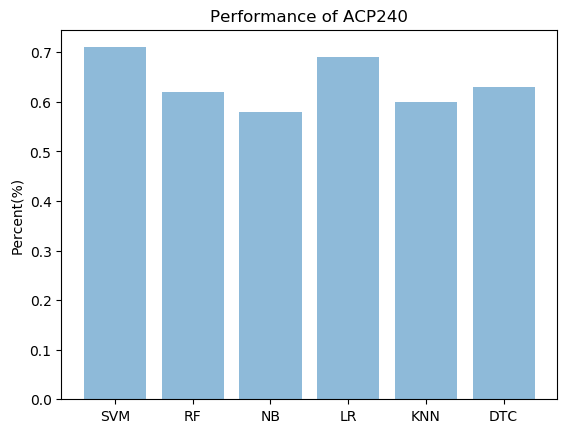

In [102]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('SVM', 'RF', 'NB', 'LR', 'KNN', 'DTC')
y_pos = np.arange(len(objects))
performance = accuracy[:]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percent(%)')
plt.title('Performance of ACP240')

plt.show()